# Assignment: Unsupervised Machine Learning \ Genetic Algorithms

In this assignment you will experience with Genetic Algorithms (GAs), starting from a basic implementation, continuing with dedicated improvements, and later applying it in various unsupervised machine learning scenarios.

## Part 1: Time Series of 'Likes' Influenced by Personalization

Various personalization algorithms are applied in e-commerce and other kinds of websites/apps in order to increase purchases or user engagement.

The following time series were collected over a period of 20 months from a large online retail store. In this study, during the first 10 months (normalized as the period from month -10 to month 0) a contextual personalization algorithm was applied in order to increase user engagement (measured as the accumulated number of 'Likes' on products shared via Facebook). As in the case with many contextual approaches, this algorithm suffered from the 'filter bubble' problem (https://en.wikipedia.org/wiki/Filter_bubble), and therefore reached a plateau quite quickly.

Nonetheless, this step enabled a more advanced collaborative filtering algorithm to analyze the collected data, learn, and increase user engagement once it was applied in the following 10 months. A classic inflection point was detected after the transition to the new algorithm. A domain expert envisioned the inflection dynamics will behave similarly to the formula f(x) = ax^3 + bx^2 + cx + d. The values of a, b, c and d were found to be 4.8, 12.1, 53.2 and 6219, respectively.

<< Please note: This function is an analytical solution, used here for simplifying the actual study, where a dynamic model was created with ODEs >>

We are given a sample sparse data of users from 10 different European countries. In this project, we will implement a simple GA in order to fit our data to the above-mentioned function, and discover the parameters for a, b, c and d. 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read measured data from an Excel file

In [2]:
xlsx = pd.ExcelFile('/home/ubuntu/unsu/exe3/exe3/data/European Measurements.xlsx')
sheet1 = xlsx.parse(3) # Note the other datasets in the file.
variables = ["Month","Avg. Likes"]
data = sheet1.loc[:, variables].values


### Simple GA mechanism

In [4]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        for event in range(len(data)):
            error = 0;
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time**3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1/error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

def biased_selection(pop, fitness, num_parents):
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    recombination_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(-100, 100, 1)
        random_index = np.random.randint(0,offspring_recombination.shape[1],1)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination


### GA application for fitting time series data

The population of the first generation: 
[[5873 2651 3753 5494]
 [8468 4994 6864 3504]
 [3370 9093  821 8852]
 ...
 [2121 8923 9882 1779]
 [8864 6603 1551 9866]
 [3598 3562 5148 1846]]

Evolution:
Generation =  0 	Best fitness =  94189324873.12337
Generation =  1 	Best fitness =  75970405115.24323
Generation =  2 	Best fitness =  75970405115.24323
Generation =  3 	Best fitness =  73846184094.58661
Generation =  4 	Best fitness =  44989769239.00908
Generation =  5 	Best fitness =  44935909956.62112
Generation =  6 	Best fitness =  35625399375.48539
Generation =  7 	Best fitness =  29521569056.22052
Generation =  8 	Best fitness =  17553346740.36965
Generation =  9 	Best fitness =  14782862095.6227
Generation =  10 	Best fitness =  8099962893.09877
Generation =  11 	Best fitness =  6232675206.28763
Generation =  12 	Best fitness =  3510701010.12835
Generation =  13 	Best fitness =  1234181459.26736
Generation =  14 	Best fitness =  661477564.96994
Generation =  15 	Best fitness =  214168

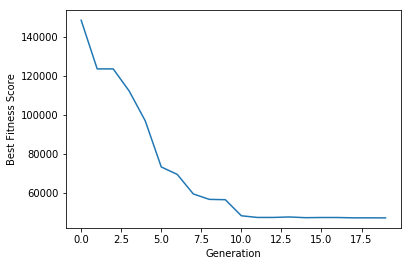

In [5]:
# GA Parameters
formula_degree = 4
number_of_solutions = 500
number_of_parents = 250
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 20
best_outputs = []

# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", round(1/np.max(fitness),5))
    best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

## Challenge 231

Implement a new and improved GA, based on the one above, by taking the following actions:
1. Make the bias_selection function give more chances to solutions with better fitness values, but not necesseraly take the best ones, as currently done.
2. Make the recombination function make real random recombination along the chromosome and between chromosomes
3. Change the mutation rate and/or scale to better avoid local minima while keeping evolution time short
4. Apply a smarter stopping criterion
5. Think of a data preparation step you can take in order to increase statistical significance
6. Consider different GA parameters in order to reach better results

In [6]:
import random

The population of the first generation: 
[[4879 5066 5818 1586]
 [4444 9467 7821 7937]
 [ 240 9971 1840  103]
 ...
 [6640 8221 2008 2961]
 [1499 9145 3236 4277]
 [7926  917 6694 7350]]

Evolution:
Generation =  0 	Best fitness =  53957212668.96928
Generation =  1 	Best fitness =  14492287917.75845
Generation =  2 	Best fitness =  1388227033.89418
Generation =  3 	Best fitness =  142794585.63218
Generation =  4 	Best fitness =  216765.80694
Generation =  5 	Best fitness =  2248.54737
Generation =  6 	Best fitness =  207.90324
Generation =  7 	Best fitness =  0.00659
Generation =  8 	Best fitness =  0.00659
Generation =  9 	Best fitness =  0.00659
Generation =  10 	Best fitness =  0.00659
Generation =  11 	Best fitness =  0.00659
Generation =  12 	Best fitness =  0.00659
Generation =  13 	Best fitness =  0.00659
Generation =  14 	Best fitness =  0.00659
Generation =  15 	Best fitness =  0.00659
Generation =  16 	Best fitness =  0.00659
Generation =  17 	Best fitness =  0.00659
Generation

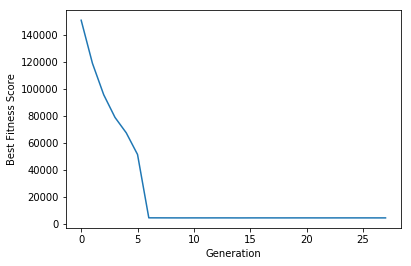

In [7]:
def biased_selection(pop, fitness, num_parents):

    total_fitness = sum(fitness)
    probs = [f / total_fitness for f in fitness]

    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        choice_index = np.random.choice(len(fitness), 1, p=probs)
        parents[parent_num, :] = pop[choice_index, :]

    return parents


def recombination(parents, offspring_size):

    offspring = np.empty(offspring_size)

    for k in range(0, offspring_size[0]):
        choices_index = np.random.choice(len(parents), 2)

        parent1_idx = choices_index[0]
        parent2_idx = choices_index[1]

        for chromozom_index in range(offspring_size[1]):
            if random.uniform(0, 1) <=0.5:
                take =  parents[parent1_idx, chromozom_index]
            else:
                take = parents[parent2_idx, chromozom_index]

            offspring[k, chromozom_index] = take

    return offspring


def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):

        if np.random.uniform(0,1) >= 0.5:

            random_value = np.random.randint(-100, 100, 1)
            random_index = np.random.randint(0,offspring_recombination.shape[1],1)

            offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination



formula_degree = 4
number_of_solutions = 500
number_of_parents = 250
population_size = (number_of_solutions,formula_degree)
number_of_generations = 50
best_outputs = []

new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
prev_best = None
no_improve = 0

for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    best_fitness = round(1 / np.max(fitness), 5)
    
    if prev_best is None or prev_best > best_fitness:
        prev_best = best_fitness
        no_improve = 0
    else:
        no_improve += 1

    print("Generation = ", generation, "\tBest fitness = ", best_fitness)
    
    best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    if no_improve == 20:
        print('no improve')
        break
    
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()




## Part 2: Solving Different Problems With the Same GA

Below is a reminder of the K-Means algorithm you implemented in Assignment 21X.

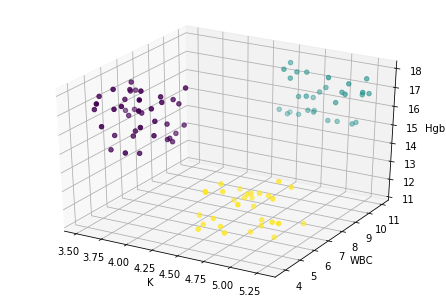

In [3]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

xlsx = pd.ExcelFile('/home/ubuntu/unsu/exe3/exe3/data/EMR-Blood.xlsx')
sheet1 = xlsx.parse(0)
sheet1.set_index("Key", inplace=True)

variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

y_pred_KMeans1 = KMeans(n_clusters=3).fit_predict(EMR3d1)

def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

In [11]:
y_pred_KMeans1.shape,EMR3d1.shape

((100,), (100, 3))

## Challenge 232

Solve the same clustering problem with a GA **without** assuming K, by trying to minimize the intra-cluster distances and maximize the inter-cluster distances.

In [30]:
# Add your code for Challenge 232 after this line, and keep it in this cell.
import pandas as pd
import random
import numpy as np
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from scipy.spatial import distance

import time
random.seed(int(time.time()))
np.random.seed(int(time.time()))


In [5]:
number_of_solutions = 500
number_of_parents = 30
number_of_generations = 20
best_outputs = []
population_size = 100


In [6]:
def fitness(indv, points):
    points_cluster_index = assign(indv, points)
    calculated_centers = np.zeros(shape=indv.shape)

    error1 = 0.0
    for index, cluster in enumerate(indv):
        indices = np.where(points_cluster_index == index)[0]

        if len(indices) > 0:
            cluster_points = points[indices]
            calculated_centers[index] = np.sum(cluster_points, axis=0) / cluster_points.shape[0]

            distances = cdist(calculated_centers[index].reshape(-1,3), cluster_points)
            error1 += np.sum(distances)


    rows_sum =np.sum(calculated_centers, axis=1)
    non_zero_rows = np.where(rows_sum > 0)

    calculated_centers = calculated_centers[non_zero_rows]

    return calculated_centers, 1/error1



def assign(cluster, points):

    return np.argmin(cdist(cluster, points), axis=0)


def crossOver(p1, p2):

    if p1.shape[0] < p2.shape[0]:
        small = p1
        big = p2
    else:
        small = p2
        big = p1

    distances = cdist(small, big)
    small_to_big = {}
    big_to_small = {}
    pairs = []
    for row_index in range(distances.shape[0]):
        current_is_the_closest = np.where(np.argmin(distances, axis=0) == row_index)[0]
        if len(current_is_the_closest) > 0:
            selected = np.random.choice(current_is_the_closest)
        else:
            selected = np.argmin(distances[row_index, :])

        distances[:, selected] = float('inf')
        small_to_big[row_index] = selected
        big_to_small[selected] = row_index

        pairs.append((row_index, selected))

    not_used = [x for x in range(big.shape[0]) if x not in big_to_small]
    size = random.randint(min(p1.shape[0], p2.shape[0]), max(p1.shape[0], p2.shape[0]))
    generated = np.zeros(shape=(size, p1.shape[1]))

    for set_index in range(size):
        if set_index < len(pairs):
            if np.random.uniform(0, 1) < 0.5:
                generated[set_index] = small[pairs[set_index][0]]
            else:
                generated[set_index] = big[pairs[set_index][1]]
        else:
            not_used_index = np.random.choice(not_used, 1)
            generated[set_index] = big[not_used_index, :]
            not_used.remove(not_used_index)

    return [generated]


def mutation(inv):

    for center_index in range(len(inv)):
        #center_index = random.randint(0, len(inv) - 1)
        if np.random.uniform(0,1) >= 0.5:
            for dimension_index in range(inv[center_index].shape[0]):
                change_param = np.random.uniform(low=0, high=1, size=1)[0]

                inv[center_index][dimension_index] += (
                            2 * change_param * inv[center_index][dimension_index]) if change_param != 0 \
                    else (2 * change_param)



In [7]:
population = []

for x in range(population_size):
    num_of_centers = random.randint(2, 12)
    centers_to_take = np.random.choice(EMR3d1.shape[0], num_of_centers, replace=False)
    population.append( EMR3d1[centers_to_take])


max_dis = np.max(cdist(EMR3d1, EMR3d1))/4





In [8]:
best_fitness = float('-inf')
best_cluster = None
noChange = 0
while True:
    if noChange == 50:
        break
    fitness_values = []
    actual_centers = []
    for invd in population:
        centers, fitness_val = fitness(invd, EMR3d1)
        actual_centers.append(centers)
        fitness_values.append(fitness_val)

    max_index = np.argmax(fitness_values)
    current_fitness = fitness_values[max_index]
    
    if best_fitness < current_fitness:
        print('fitness improvment prev {0} current {1}'.format(best_fitness, current_fitness))
        best_fitness = current_fitness
        best_cluster = actual_centers[max_index]
        noChange = 0
    else:
        print('no itness improvment prev {0} current {1}'.format(best_fitness, current_fitness))
        noChange += 1
        
        
    

    total_fitness = sum(abs(f) for f in  fitness_values)
    probs = [abs(f) / total_fitness for f in fitness_values]

    new_population = []
    while len(new_population) < population_size:

        ind1,ind2 = np.random.choice(len(actual_centers), size = 2, replace=False, p=probs)

        p1 = actual_centers[ind1]
        p2 = actual_centers[ind2]

        generated_arr = crossOver(p1, p2)

        for generated in generated_arr:
            mutation(generated)
            new_population.append(generated)

    population = new_population

fitness improvment prev -inf current 0.018065992079761714
no itness improvment prev 0.018065992079761714 current 0.013948060525502588
no itness improvment prev 0.018065992079761714 current 0.011848766328065523
no itness improvment prev 0.018065992079761714 current 0.010417677144365233
no itness improvment prev 0.018065992079761714 current 0.0100962080596099
no itness improvment prev 0.018065992079761714 current 0.009180139295469654
no itness improvment prev 0.018065992079761714 current 0.0055480298538637006
no itness improvment prev 0.018065992079761714 current 0.0055480298538637006
no itness improvment prev 0.018065992079761714 current 0.0055480298538637006
no itness improvment prev 0.018065992079761714 current 0.0055480298538637006
no itness improvment prev 0.018065992079761714 current 0.00336156262971301
no itness improvment prev 0.018065992079761714 current 0.00336156262971301
no itness improvment prev 0.018065992079761714 current 0.00336156262971301
no itness improvment prev 0.018

## Challenge 233

Solve the feature selection problem from Kaggle's [Don't Overfit! II challenge](https://www.kaggle.com/c/dont-overfit-ii) with a GA. This is the same dataset you used in the former assignment. Did you reach better results?

In [31]:
# Add your code for Challenge 233 after this line, and keep it in this cell.

train_df = pd.read_csv('/home/ubuntu/unsu/exe2/dont-overfit-ii/train.csv', header=0)
test_df = pd.read_csv('/home/ubuntu/unsu/exe2/dont-overfit-ii/test.csv', header=0)

In [32]:
train_df.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [33]:
import pandas as pd
import random
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [34]:
tr_idx = np.random.choice(train_df.shape[0], 150, replace=False)
cv_idx = train_df.index.difference(tr_idx)

In [35]:
ALL_FEATURES = train_df.columns[2:]
POPULATION_SIZE = 100

In [36]:
def fitness(individual):
    model = RandomForestClassifier(n_estimators=100, max_depth=4)
    model.fit(train_df.loc[tr_idx, individual], train_df.loc[tr_idx, "target"])

    score = model.score(train_df.loc[cv_idx, individual], train_df.loc[cv_idx, "target"])
    return score


def mutation(indv):

    not_in = [feature for feature in ALL_FEATURES if feature not in indv]

    if len(not_in) > 0:

        num_of_mutation = max(min(len(not_in), int(len(indv) * 0.1)),1)

        indices = np.random.choice(len(not_in), num_of_mutation, replace=False)

        for add_index in indices:
            remove_index = np.random.choice(len(indv), size=1)[0]
            indv[remove_index] =  not_in[add_index]

def crossOver(population, fitness_values):
    total_fitness = sum(fitness_values)
    probs = [f / total_fitness for f in fitness_values]

    new_population = []
    while len(new_population) < POPULATION_SIZE:
        ind1, ind2 = np.random.choice(len(population), size=2, replace=False, p=probs)

        ind1 = list(population[ind1])
        ind2 = list(population[ind2])

        #generated = []
        size = random.randint(min(len(ind1), len(ind2)), max(len(ind1), len(ind2)))

        generated = []
        for set_index in range(size):
            if len(ind1) >0 and len(ind2) > 0:
                if np.random.uniform(0, 1) < 0.5:
                    feature = str(np.random.choice(ind1, size=1)[0])
                    ind1.remove(feature)

                    if feature in ind2:
                        ind2.remove(feature)
                else:
                    feature = str(np.random.choice(ind2, size=1)[0])
                    ind2.remove(feature)
                    if feature in ind1:
                        ind1.remove(feature)
            elif len(ind1) > 0:
                feature = str(np.random.choice(ind1, size=1)[0])
                ind1.remove(feature)
            else:
                feature = np.random.choice(ind2, size=1)[0]
                ind2.remove(feature)

            #generated.append(feature)
            generated.append( feature)

        mutation(generated)

        new_population.append(generated)
    
    return new_population




In [37]:
population =[]
for x in range(POPULATION_SIZE):
    num_of_features = random.randint(1, len(ALL_FEATURES))

    features_to_take = np.random.choice(len(ALL_FEATURES), num_of_features, replace=False)
    population.append(ALL_FEATURES[features_to_take])

In [38]:
best_fitness = None
best_features = None
best_features_counter = 0
last_best = None
while best_features_counter < 300:
    
    population_fitness = []
    for x in population:
        fit = fitness(x)

        population_fitness.append(fit)

        max_index = np.argmax(population_fitness)

        if not best_fitness or best_fitness < population_fitness[max_index]:
            best_fitness = population_fitness[max_index]
            best_features = population[max_index]


        if last_best is not None:
            if len(last_best) != len(best_features) or set(last_best) != set(best_features):
                last_best = best_features
                best_features_counter = 0
                print(best_fitness)
            else:
                best_features_counter = best_features_counter + 1
        else:
            last_best = best_features
            best_features_counter = 0

    population = crossOver(population, population_fitness)

0.61
0.62
0.63
0.64
0.65
